<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Analyzing a real world data-set with SQL and Python


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Understand a dataset of selected socioeconomic indicators in Chicago
* Learn how to store data in an Db2 database on IBM Cloud instance
* Solve example problems to practice your SQL skills


## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01), but to summarize, the dataset has the following variables:

* **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

* **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

* **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database
Let us first load the SQL extension and establish a connection with the database

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you may need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [1]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
# !pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
# !pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
# !pip install ipython-sql

In [2]:
%load_ext sql

In [4]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://pgq30600:OKkWacfZ5pRD9nmV@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/BLUDB?security=SSL

'Connected: pgq30600@BLUDB'

### Store the dataset in a Table
##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the dataset source .CSV from the internet into pandas dataframe

##### Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table


In [5]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://pgq30600:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/BLUDB


'Persisted chicago_socioeconomic_data'

##### You can verify that the table creation was successful by making a basic query like:


## Problems

### Problem 1

##### How many rows are in the dataset?


In [7]:
%sql SELECT COUNT(*) AS COUNT FROM chicago_socioeconomic_data;

 * ibm_db_sa://pgq30600:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/BLUDB
Done.


COUNT
78


<details><summary>Click here for the solution</summary>

```python
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

Correct answer: 78
```

</details>


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?


In [9]:
%sql SELECT COUNT(*) AS COUNT FROM chicago_socioeconomic_data WHERE hardship_index>50.0

 * ibm_db_sa://pgq30600:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/BLUDB
Done.


COUNT
38


<details><summary>Click here for the solution</summary>

```python
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

Correct answer: 38
```

</details>


### Problem 3

##### What is the maximum value of hardship index in this dataset?


In [11]:
%sql SELECT MAX(hardship_index) AS MAX FROM chicago_socioeconomic_data

 * ibm_db_sa://pgq30600:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/BLUDB
Done.


MAX
98.0


<details><summary>Click here for the solution</summary>

```python
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

Correct answer: 98.0
```

</details>



### Problem 4

##### Which community area which has the highest hardship index?


In [19]:
%sql SELECT * FROM chicago_socioeconomic_data

 * ibm_db_sa://pgq30600:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [22]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST LIMIT 1

 * ibm_db_sa://pgq30600:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/BLUDB
Done.


community_area_name
Riverdale


<details><summary>Click here for the solution</summary>

```python
#We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

#or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

#or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

Correct answer: 'Riverdale'
    
```

</details>



### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [13]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_>60000

 * ibm_db_sa://pgq30600:***@b0aebb68-94fa-46ec-a1fc-1c999edb6187.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:31249/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


<details><summary>Click here for the solution</summary>

```python
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

Correct answer:Lake View,Lincoln Park, Near North Side, Loop
    
```

</details>




### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

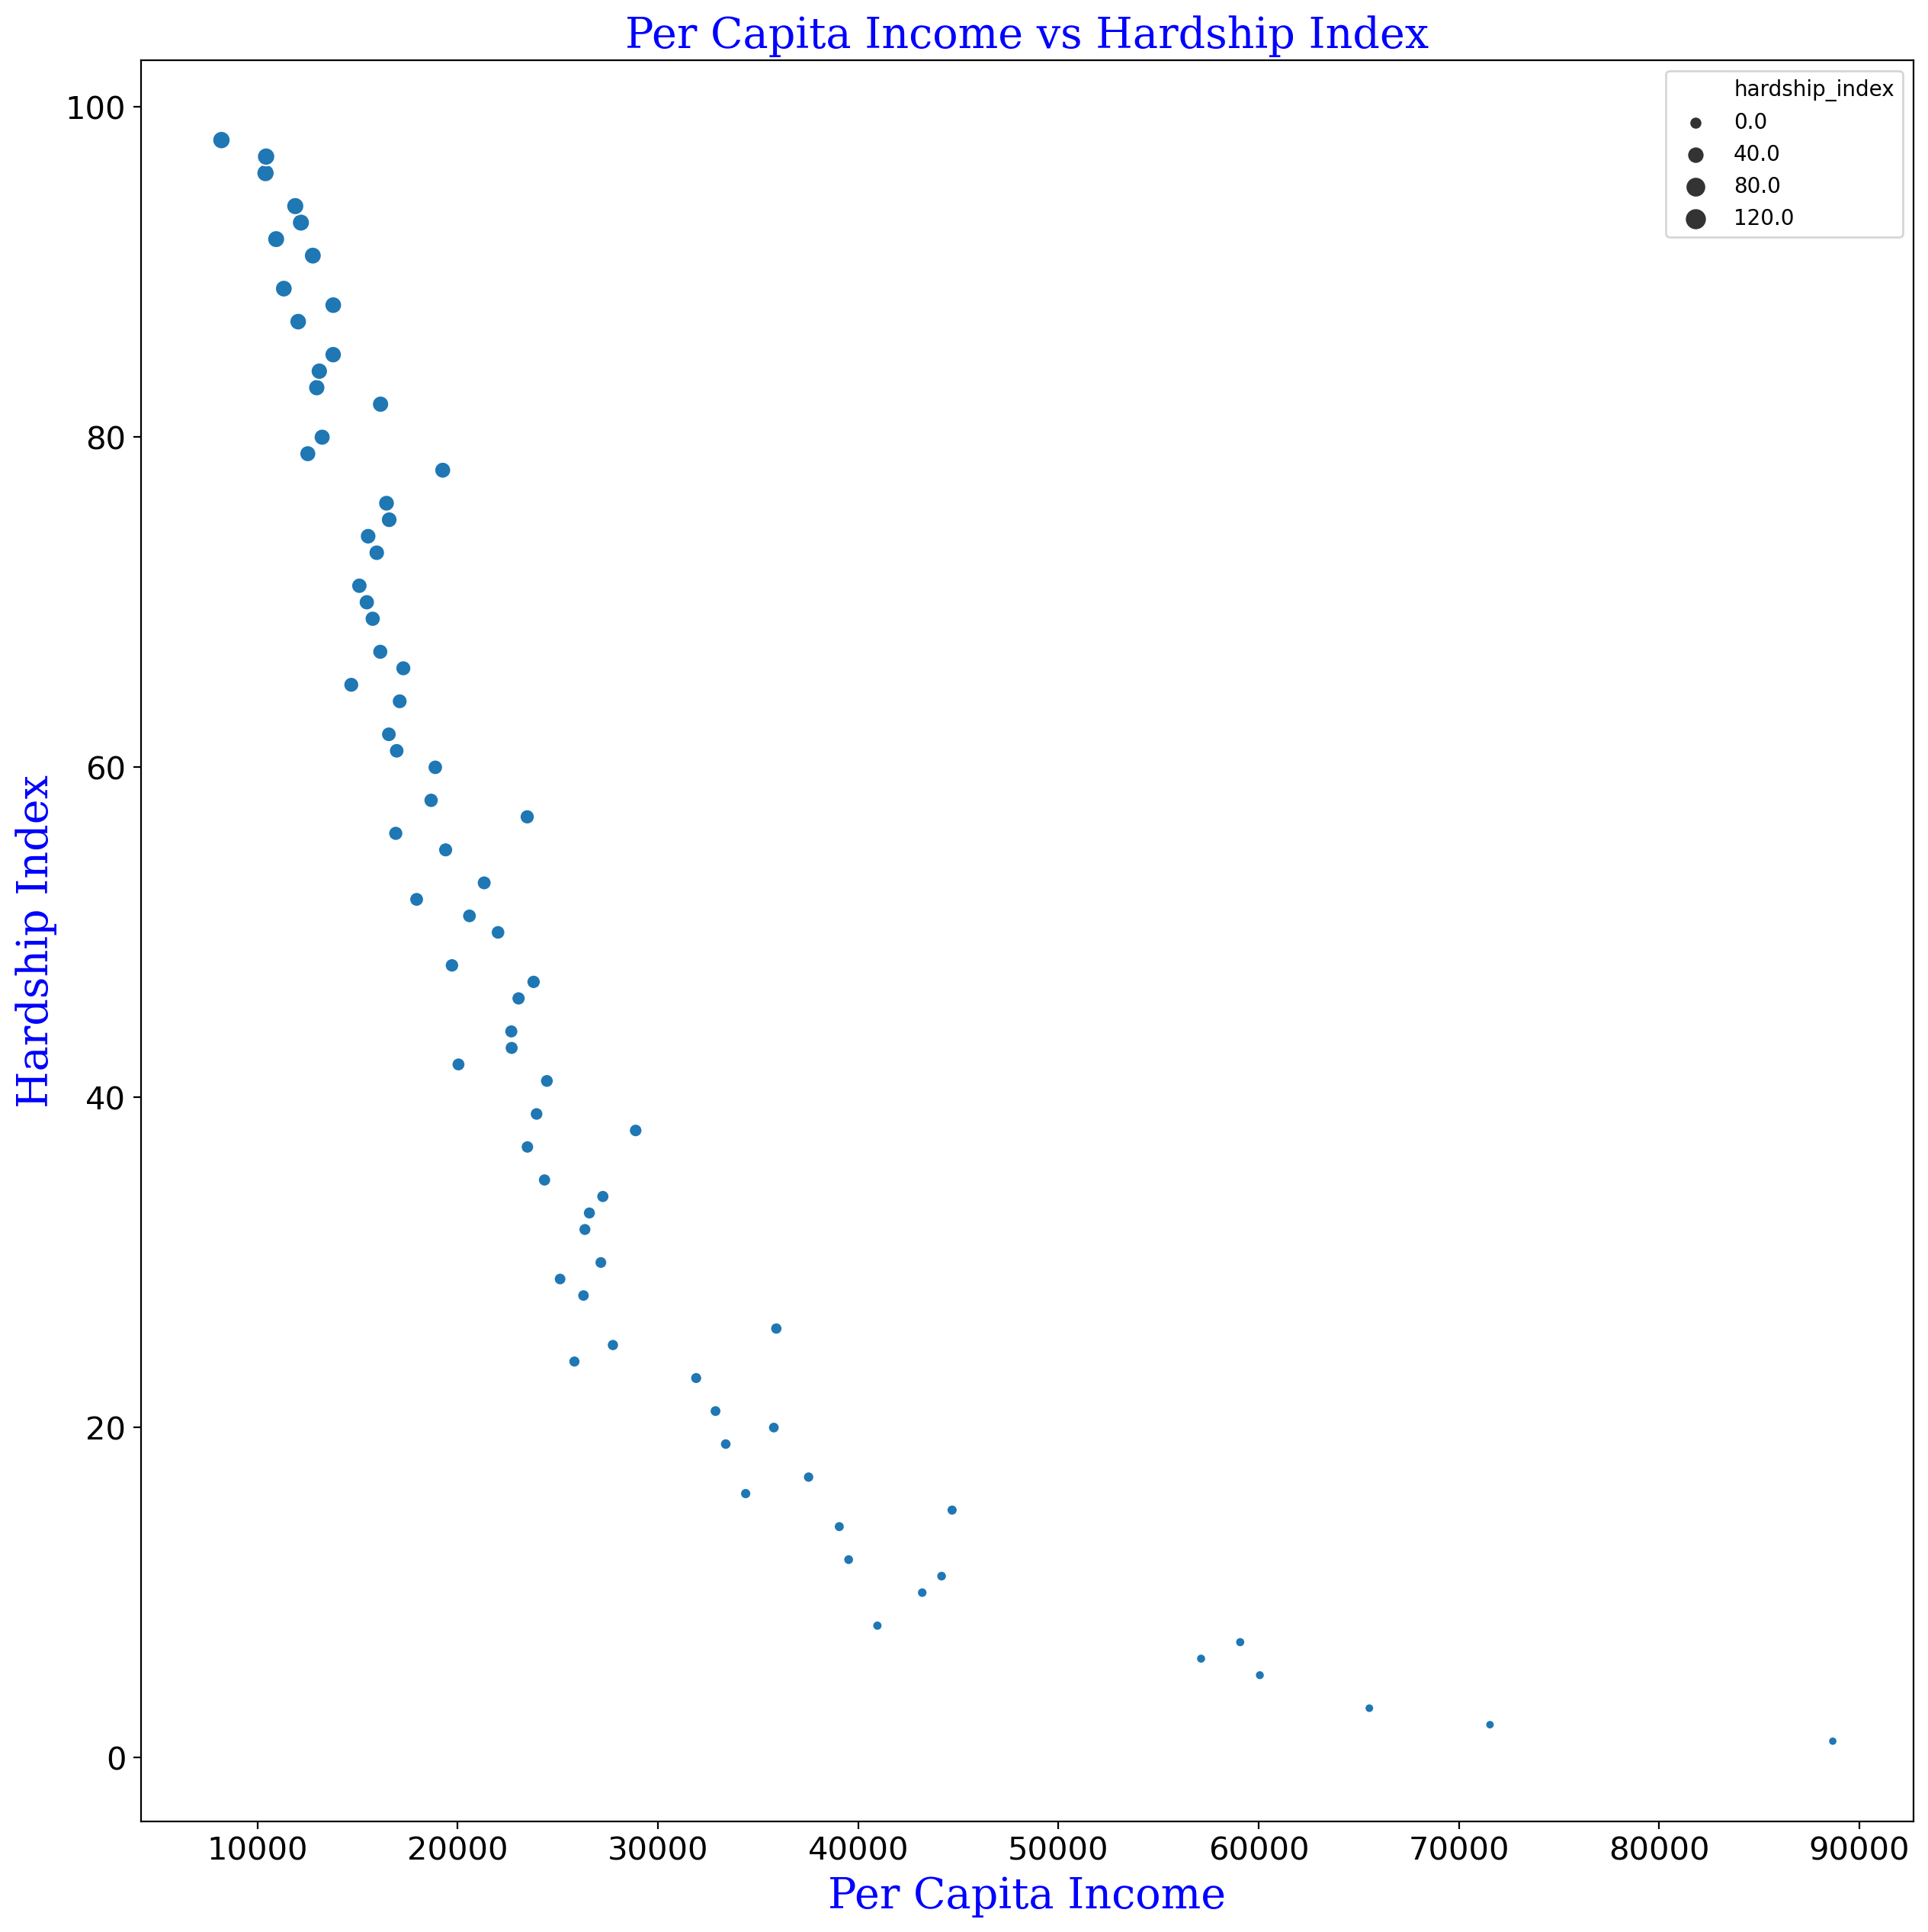

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig,ax=plt.subplots(figsize=(15, 15), dpi=200)
ax=sns.scatterplot(x='per_capita_income_', y='hardship_index', data= chicago_socioeconomic_data,size='hardship_index')
font = {'family': 'serif', 'color': 'blue', 'size': 20}
ax.set_title('Per Capita Income vs Hardship Index',loc='center',fontdict=font)
ax.set_xlabel('Per Capita Income',fontdict=font)
ax.set_ylabel('Hardship Index',fontdict=font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# ax.set(title='Per Capita Income vs Hardship Index',xlabel='Per Capita Income',ylabel='Hardship Index')

<details><summary>Click here for the solution</summary>

```python
# if the import command gives ModuleNotFoundError: No module named 'seaborn'
# then uncomment the following line i.e. delete the # to install the seaborn package 
# !pip install seaborn==0.9.0

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

Correct answer:You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 
    
```

</details>




### Conclusion

##### Now that you know how to do basic exploratory data analysis using SQL and python visualization tools, you can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!


(array([-60., -40., -20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 0, ''),
  Text(0, 0, '')])

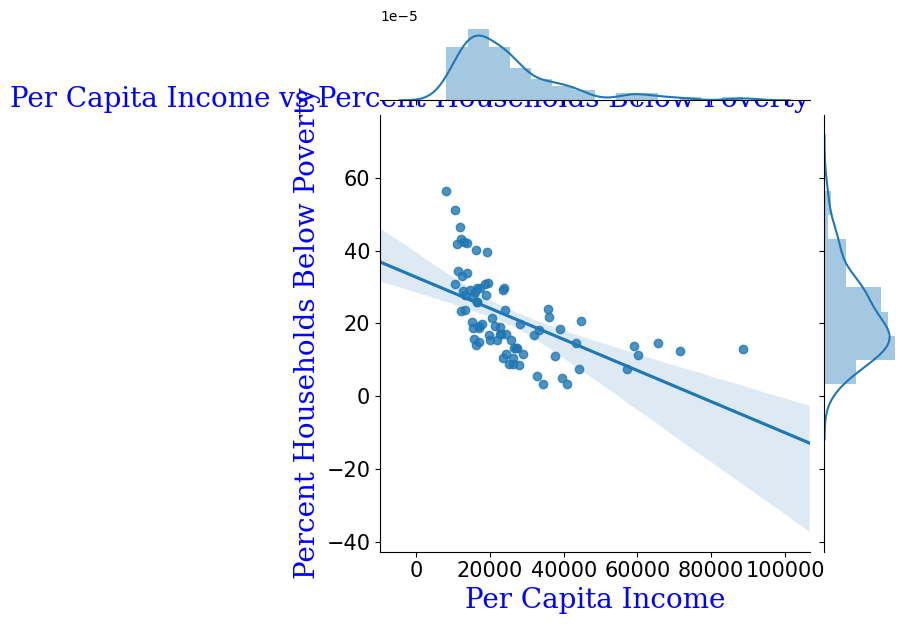

In [25]:
font = {'family': 'serif', 'color': 'blue', 'size': 20}
sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty', data=chicago_socioeconomic_data,kind='reg')
plt.title('Per Capita Income vs Percent Households Below Poverty',loc='right',fontdict=font)
plt.xlabel('Per Capita Income',fontdict=font)
plt.ylabel('Percent Households Below Poverty',fontdict=font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]), [])

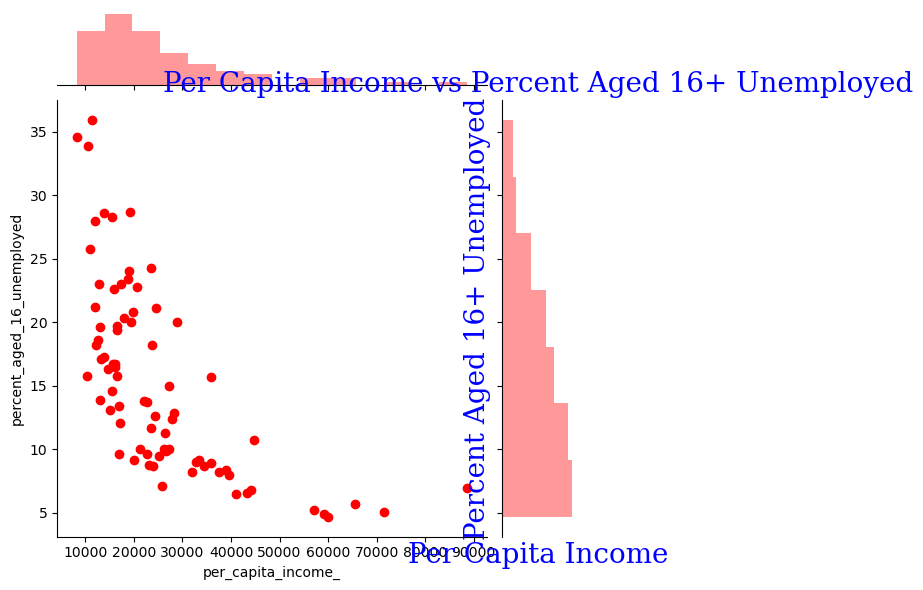

In [26]:
font = {'family': 'serif', 'color': 'blue', 'size': 20}
sns.jointplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=chicago_socioeconomic_data, kind='scatter',color='r')
plt.title('Per Capita Income vs Percent Aged 16+ Unemployed',loc='center',fontdict=font)
plt.xlabel('Per Capita Income',fontdict=font)
plt.ylabel('Percent Aged 16+ Unemployed',fontdict=font)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Summary

##### In this lab you learned how to store a real world data set from the internet in a database (Db2 on IBM Cloud), gain insights into data using SQL queries. You also visualized a portion of the data in the database to see what story it tells.


## Author

<a href="https://www.linkedin.com/in/ravahuja/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork22-2022-01-01" target="_blank">Rav Ahuja</a>


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2021-11-17  | 2.3  | Lakshmi  | Updated library  |
| 2021-07-09 | 2.2 | Malika | Updated connection string |
| 2021-05-06 | 2.1 |Malika Singla | Added libraries |
| 2020-08-28  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
